In [1]:
# oggm_cr2_env
from oggm import cfg
cfg.initialize() #'/Users/milliespencer/.oggm_config'

cfg.PARAMS['use_multiprocessing']  # whether to use multiprocessing

cfg.PARAMS['mp_processes']  # number of processors to use


/Users/milliespencer/miniconda3/envs/oggm_cr2_env/lib/python3.11/site-packages/oggm/__init__.py:8: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound
2026-01-26 18:39:19: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2026-01-26 18:39:19: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2026-01-26 18:39:19: oggm.cfg: Multiprocessing: using all available processors (N=8)
2026-01-26 18:39:19: oggm.utils: Checking the download verification file checksum...


8

In [2]:
import os

import oggm

from oggm import cfg, workflow

from oggm.utils import gettempdir

cfg.initialize()  # always initialize before an OGGM task

# The working directory is where OGGM will store the run's data
cfg.PATHS['working_dir'] = os.path.join(gettempdir(), 'Docs_GlacierDir')

# The base url is where to find the pre-processed directories
base_url = 'https://cluster.klima.uni-bremen.de/~oggm/gdirs/oggm_v1.6/L1-L2_files/elev_bands/'

gdirs = workflow.init_glacier_directories('RGI60-11.00897',
                                          from_prepro_level=1,
                                          prepro_base_url=base_url,
                                          prepro_border=10)


gdir = gdirs[0]  # init_glacier_directories always returns a list

2026-01-26 18:39:20: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2026-01-26 18:39:20: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2026-01-26 18:39:20: oggm.cfg: Multiprocessing: using all available processors (N=8)
2026-01-26 18:39:21: oggm.workflow: init_glacier_directories from prepro level 1 on 1 glaciers.
2026-01-26 18:39:24: oggm.workflow: Execute entity tasks [gdir_from_prepro] on 1 glaciers
2026-01-26 18:39:26: oggm.utils: No known hash for cluster.klima.uni-bremen.de/~oggm/gdirs/oggm_v1.6/L1-L2_files/elev_bands/RGI62/b_010/L1/RGI60-11/RGI60-11.00.tar


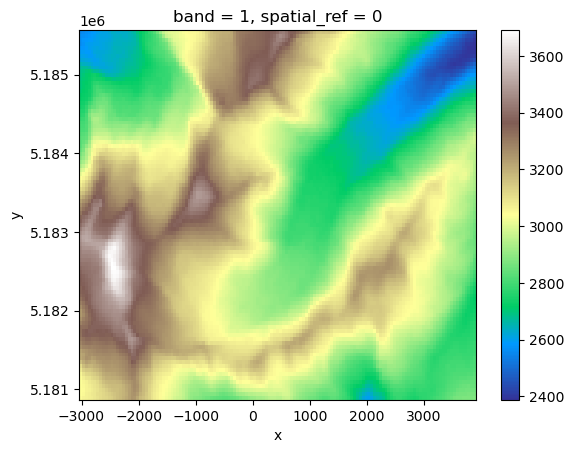

In [9]:
fdem = gdir.get_filepath('dem')

fdem

import rioxarray as rioxr

rioxr.open_rasterio(fdem).plot(cmap='terrain');

In [3]:
from oggm.shop import cr2met_25
print(cr2met_25.__file__)

/Users/milliespencer/miniconda3/envs/oggm_cr2_env/lib/python3.11/site-packages/oggm/shop/cr2met_25.py


## poking around alexis' data

In [8]:
# cr2met nc files 

precip_file1 = '/Users/milliespencer/Desktop/CR2_OGGM_Paper/files_chile_OGGM_climate_comparison/CR2met_pr_2022_1960_dic_2021_2.5.nc'
precip_file2 = '/Users/milliespencer/Desktop/CR2_OGGM_Paper/files_chile_OGGM_climate_comparison/CR2MET_pr_v2.5_month_1960_2021_005deg.nc'
temp_file = '/Users/milliespencer/Desktop/CR2_OGGM_Paper/files_chile_OGGM_climate_comparison/CR2met_t2m_hgt_2022_1960_dic_2021_2.5.nc'
tmean_file = '/Users/milliespencer/Desktop/CR2_OGGM_Paper/files_chile_OGGM_climate_comparison/CR2MET_tmean_v2.5_mon_1960_2021_005deg.nc'

import xarray as xr

# Open without decoding times
ds = xr.open_dataset(temp_file, decode_times=False) #switch out file name to explore each
print(ds)

# Check the variables
print(ds.data_vars)
print(ds.coords)

<xarray.Dataset> Size: 524MB
Dimensions:  (time: 744, lat: 800, lon: 220)
Coordinates:
  * time     (time) float64 6kB 1.0 2.0 3.0 4.0 5.0 ... 741.0 742.0 743.0 744.0
  * lat      (lat) float64 6kB -56.98 -56.93 -56.88 ... -17.12 -17.07 -17.02
  * lon      (lon) float64 2kB -76.97 -76.92 -76.88 ... -66.12 -66.08 -66.03
Data variables:
    temp     (time, lat, lon) float32 524MB ...
    hgt      (lat, lon) float32 704kB ...
Data variables:
    temp     (time, lat, lon) float32 524MB ...
    hgt      (lat, lon) float32 704kB ...
Coordinates:
  * time     (time) float64 6kB 1.0 2.0 3.0 4.0 5.0 ... 741.0 742.0 743.0 744.0
  * lat      (lat) float64 6kB -56.98 -56.93 -56.88 ... -17.12 -17.07 -17.02
  * lon      (lon) float64 2kB -76.97 -76.92 -76.88 ... -66.12 -66.08 -66.03


In [10]:
import xarray as xr

precip_file = '/Users/milliespencer/Desktop/CR2_OGGM_Paper/files_chile_OGGM_climate_comparison/CR2met_pr_2022_1960_dic_2021_2.5.nc'
ds = xr.open_dataset(precip_file, decode_times=False)
print(ds)
print("\nVariables:", list(ds.data_vars))

<xarray.Dataset> Size: 524MB
Dimensions:  (time: 744, lat: 800, lon: 220)
Coordinates:
  * time     (time) float64 6kB 1.0 2.0 3.0 4.0 5.0 ... 741.0 742.0 743.0 744.0
  * lat      (lat) float64 6kB -56.98 -56.93 -56.88 ... -17.12 -17.07 -17.02
  * lon      (lon) float64 2kB -76.97 -76.92 -76.88 ... -66.12 -66.08 -66.03
Data variables:
    prcp     (time, lat, lon) float32 524MB ...

Variables: ['prcp']


In [11]:
import pandas as pd

# Check RGI_BNA_Clusters.csv
rgi_df = pd.read_csv('/Users/milliespencer/Desktop/CR2_OGGM_Paper/files_chile_OGGM_climate_comparison/RGI_BNA_Clusters.csv')
print("RGI_BNA_Clusters.csv:")
print(rgi_df.head(10))
print(f"\nShape: {rgi_df.shape}")
print(f"Columns: {list(rgi_df.columns)}")
print(f"\nClusters: {rgi_df['Cluster'].unique()}")

print("\n" + "="*60 + "\n")

# Check LR_Pf.csv
param_df = pd.read_csv('/Users/milliespencer/Desktop/CR2_OGGM_Paper/files_chile_OGGM_climate_comparison/LR_Pf.csv')
print("LR_Pf.csv:")
print(param_df)
print(f"\nShape: {param_df.shape}")
print(f"Columns: {list(param_df.columns)}")

RGI_BNA_Clusters.csv:
   FID           RGIId         GLIMSId   BgnDate   EndDate   CenLon   CenLat  \
0    0  RGI60-17.01304  G290723E55466S  20009999  20030531 -69.2767 -55.4660   
1    1  RGI60-17.01302  G291319E55454S  20009999  20030531 -68.6813 -55.4541   
2    2  RGI60-17.01303  G291321E55450S  20009999  20030531 -68.6790 -55.4504   
3    3  RGI60-17.01305  G291336E55412S  20009999  20030531 -68.6643 -55.4121   
4    4  RGI60-17.01306  G291325E55410S  20009999  20030531 -68.6749 -55.4104   
5    5  RGI60-17.01330  G290276E55407S  20009999  20030531 -69.7239 -55.4074   
6    6  RGI60-17.01310  G291326E55405S  20009999  20030531 -68.6736 -55.4046   
7    7  RGI60-17.01313  G291340E55404S  20009999  20030531 -68.6602 -55.4043   
8    8  RGI60-17.01331  G290273E55404S  20009999  20030531 -69.7271 -55.4036   
9    9  RGI60-17.01308  G291560E55403S  20009999  20030531 -68.4401 -55.4028   

   O1Region  O2Region   Area  ...  Connect  Form  TermType  Surging  Linkages  \
0        17     

In [2]:
import oggm
from oggm.shop import cru, histalp, ecmwf
import oggm.cfg as cfg

# Check available climate options
print("OGGM version:", oggm.__version__)
print("\nAvailable climate datasets:")
print("- CRU (built-in)")
print("- HISTALP (built-in)")  
print("- ECMWF (built-in)")
print("- CR2MET (custom - you have this working!)")

# Check what your version supports
help(oggm.shop)

OGGM version: 1.5.3

Available climate datasets:
- CRU (built-in)
- HISTALP (built-in)
- ECMWF (built-in)
- CR2MET (custom - you have this working!)
Help on package oggm.shop in oggm:

NAME
    oggm.shop

PACKAGE CONTENTS
    bedtopo
    cr2met_25
    cru
    ecmwf
    gcm_climate
    histalp
    its_live
    rgitopo

FILE
    /Users/milliespencer/miniconda3/envs/oggm_cr2_env/lib/python3.11/site-packages/oggm/shop/__init__.py




In [3]:
from oggm.shop import ecmwf
help(ecmwf)

Help on module oggm.shop.ecmwf in oggm.shop:

NAME
    oggm.shop.ecmwf

FUNCTIONS
    get_ecmwf_file(dataset='ERA5', var=None)
        Returns a path to the desired ECMWF baseline climate file.
        
        If the file is not present, download it.
        
        Parameters
        ----------
        dataset : str
            'ERA5', 'ERA5L', 'CERA', 'ERA5L-HMA', 'ERA5dr'
        var : str
            'inv' for invariant
            'tmp' for temperature
            'pre' for precipitation
        
        Returns
        -------
        str
            path to the file
    
    process_ecmwf_data(gdir, dataset=None, ensemble_member=0, y0=None, y1=None, output_filesuffix=None)
        Processes and writes the ECMWF baseline climate data for this glacier.
        
        Extracts the nearest timeseries and writes everything to a NetCDF file.
        
        Parameters
        ----------
        dataset : str
            'ERA5', 'ERA5L', 'CERA', 'ERA5L-HMA', 'ERA5dr'.
            